In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
Uber_data=pd.read_csv('Uber Request Data/Uber Request Data.csv')


In [5]:
Uber_data.shape

(6745, 6)

In [6]:
Uber_data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [7]:
Uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [8]:
Uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


##### Request timestamp & Drop timestamp in different formats

In [9]:
# convert Request timestamp & Drop timestamp to uniform datetime 
Uber_data['Request timestamp']=Uber_data['Request timestamp'].apply(lambda x: pd.to_datetime(x) )
Uber_data['Drop timestamp']=Uber_data['Drop timestamp'].apply(lambda x: pd.to_datetime(x))


In [10]:
Uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
Uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

#### There is mesing data in Driver id & Most of the data is invalid in Drop timestamp 

In [12]:
Uber_data.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [13]:
Uber_data['Request hour'] =Uber_data['Request timestamp'].dt.hour

In [14]:
Uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6


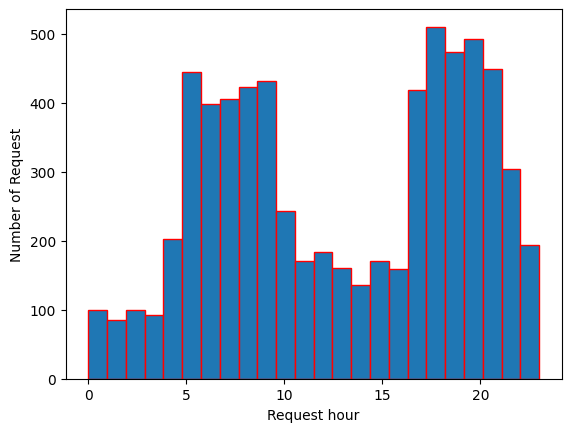

In [15]:
plt.hist(Uber_data['Request hour'],edgecolor='red',bins=24)
plt.xlabel('Request hour')
plt.ylabel('Number of Request')
plt.show()

## Session details
#### 1) Early Morning =Midnight To 5 AM
#### 2) Morning = 5 AM To 10 AM
#### 3) Day =10 AM To 5 PM
#### 4) Evening =5 PM To 10 PM
#### 5) Last Night =10 PM To Midnight

In [16]:
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5<=x<=10:
        return "Morning"
    elif 10<=x<=17:
        return "Day Time"
    elif 17<=x<=22:
        return "Evening"
    else:
        return "Last Night"

In [17]:
Uber_data['Time slot']=Uber_data['Request hour'].apply(lambda x : time_period(x))
Uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Day Time
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,Day Time
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,Morning


<AxesSubplot: >

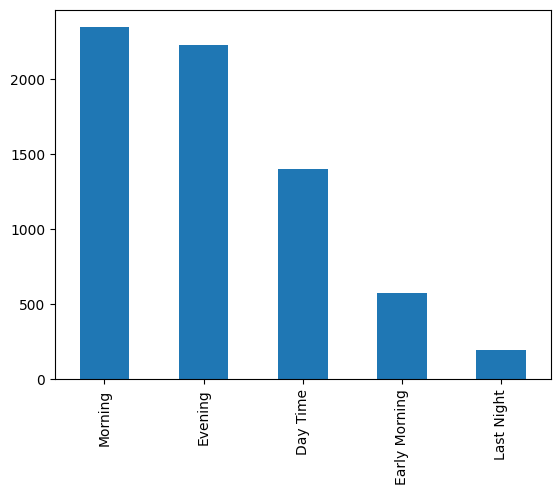

In [19]:
Uber_data['Time slot'].value_counts().plot.bar()

In [22]:
#Uber_data['Pickup point'].value_counts().plot.bar()

<AxesSubplot: ylabel='Pickup point'>

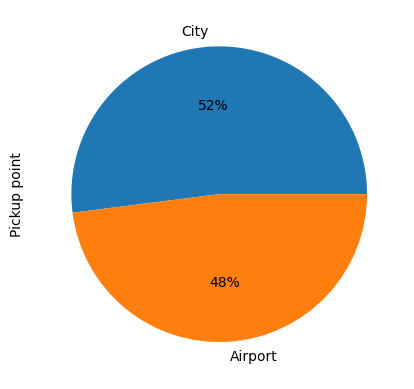

In [23]:
Uber_data['Pickup point'].value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot: ylabel='Status'>

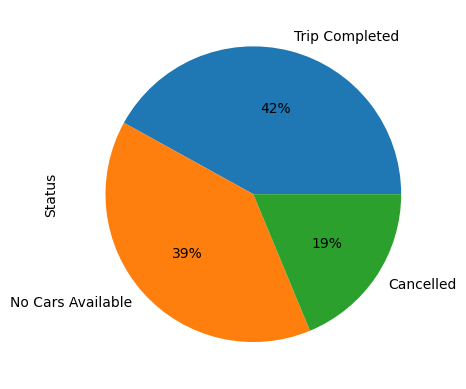

In [26]:
Uber_data['Status'].value_counts().plot.pie(autopct='%1.0f%%')

## There is a problem with the company, which is that most of the flights are cancelled